In [1]:
import pandas as pd
import numpy as np

In [2]:
#pip install -U spacy

In [3]:
#pip install -U spacy-lookups-data

In [4]:
#pip install spacy download en_core_web_sm

In [5]:
#pip install spacy download en_core_web_md

In [6]:
#pip install spacy download en_core_web_lg

In [7]:
import spacy 
from spacy.lang.en.stop_words import STOP_WORDS

In [8]:
df = pd.read_csv('twitter16m.csv', encoding= 'latin1', header= None)

df.head(10)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [9]:
df = df[[5,0]]

In [10]:
df.head()

,5,0
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [11]:
df.columns =['twitts','sentiment']
df.head()

,twitts,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [12]:
df['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [13]:
sent_map = {0: 'negative' , 4:'positive'}

# word counts

In [14]:
df['word_counts']= df['twitts'].apply(lambda x: len(str(x).split()))

In [15]:
df.head()

,twitts,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


# Charcater Countes

In [16]:
df['char_counts'] = df['twitts'].apply(lambda x:len(x))
df.head()

,twitts,sentiment,word_counts,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


# Average word length

In [17]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words) 

df['avg_word_length'] = df['twitts'].apply(lambda x:get_avg_word_len(x) )

In [18]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_length
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


# stop words count

In [19]:
print(STOP_WORDS)

{'cannot', 'sometime', 'can', 'eight', 'still', 'becomes', 'almost', 'own', 'mostly', 'though', 'must', 'several', 'my', 'of', 'both', 'we', 'this', 'when', 'less', 'everyone', 'side', 'would', 'few', 'i', 'yet', 'beforehand', 'herein', 'make', 'are', 'anywhere', 'unless', '’ve', 'therein', 'thereby', "'ll", 'via', 'became', 'fifty', 'whereafter', 'without', 'wherein', 'call', 'before', 'whatever', 'herself', 'into', 'indeed', 'they', 'to', 'thence', 'could', 'us', 'latter', 'you', 'elsewhere', 'about', 'hundred', 'really', 'whereby', 'noone', 'per', 'afterwards', 'how', 'under', 'might', 'themselves', 'besides', 'full', 'should', 'seemed', 'nor', 'somewhere', "'s", 'next', 'its', 'during', 'two', 'an', 'sixty', 'over', 'what', 'between', 'thereupon', 'for', 'more', 'however', '‘re', 'each', 'because', 'behind', '’ll', 'n‘t', 'moreover', 'be', 'twelve', 'regarding', 'whose', 'using', 'never', 'among', 'anything', 'otherwise', 'beside', 'or', 'again', 'twenty', 'onto', 'there', '’s', 'w

In [20]:
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))

In [21]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_length,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


# COunt #hastag and @Mentions

In [22]:
x = 'this #hastag and this is @mention'
#x = x.split()
#x

In [23]:
[t for t in x.split() if t.startswith('@')]

['@mention']

In [24]:
df['hashtags_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
df['mentions_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [25]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1


# if numric digits are present in twitts

In [26]:
df['numric_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [27]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numric_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0


# Upper case words count

In [28]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))

In [29]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numric_counts,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


In [30]:
df.loc[96]['twitts']

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

# preprocessing and cleaning

In [31]:
#lower case conversion

df['twitts'] = df['twitts'].apply(lambda x: x.lower())

In [32]:
df

,twitts,sentiment,word_counts,char_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numric_counts,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1599995,just woke up. having no school is the best fee...,4,11,56,4.090909,4,0,0,0,0
1599996,thewdb.com - very cool to hear old walt interv...,4,11,78,6.090909,1,0,0,0,0
1599997,are you ready for your mojo makeover? ask me f...,4,11,57,4.181818,5,0,0,0,0
1599998,happy 38th birthday to my boo of alll time!!! ...,4,12,65,4.416667,3,0,0,0,0


In [33]:
# contraction to expension


x = "i don't know what you want, can't, he'll, i'd"


In [34]:
contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

In [35]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [36]:
x =" hi i'd be happy"

In [37]:
cont_to_exp(x)

' hi i would be happy'

In [38]:
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x))

In [39]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numric_counts,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can not update his facebook b...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1


# Count and remove emails

In [40]:
import re

In [41]:
x = 'hi my email me at email@email.com another@ymail.com'

In [42]:
re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)',x)

['email@email.com', 'another@ymail.com']

In [43]:
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)',x))

In [44]:
df['email_counts'] = df['emails'].apply(lambda x: len(x))

In [45]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numric_counts,upper_counts,emails,email_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,[],0
1,is upset that he can not update his facebook b...,0,21,111,4.285714,9,0,0,0,0,[],0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,[],0


In [46]:
df[df['email_counts']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numric_counts,upper_counts,emails,email_counts
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1
...,...,...,...,...,...,...,...,...,...,...,...,...
1588338,@boudoirsextoys do not forget to shoot me an e...,4,21,127,5.047619,10,0,1,0,1,[hello@tastelikekisses.com],1
1589132,"hi there , anybody got a job for me oil &amp;...",4,15,98,5.533333,4,0,0,0,0,[aadvanspijk@yahoo.co.uk],1
1590489,"@clericaaron yes, lbruton@tulsalanparty.com is...",4,14,95,5.785714,6,0,1,0,1,[lbruton@tulsalanparty.com],1
1591675,@miss_ellen good morning!!!! congrats! se...,4,9,77,7.111111,2,0,1,0,0,[jill@q985fm.com],1


In [47]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)','',x))

# COunts url and remove it

In [48]:
x = 'hi , to watch more visit https://www.youtube.com/watch?v=EriDC-_m6IQ'

In [49]:
re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)

[('https', 'www.youtube.com', '/watch?v=EriDC-_m6IQ')]

In [50]:
df['urls_flag'] = df['twitts'].apply(lambda x: len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [51]:
re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x)

'hi , to watch more visit '

In [52]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x))

In [53]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numric_counts,upper_counts,emails,email_counts,urls_flag
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he can not update his facebook b...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,[],0,0


In [54]:
df.loc[0]

twitts             @switchfoot  - awww, that is a bummer.  you sh...
sentiment                                                          0
word_counts                                                       19
char_counts                                                      115
avg_word_length                                             5.052632
stop_words_len                                                     4
hashtags_counts                                                    0
mentions_counts                                                    1
numric_counts                                                      0
upper_counts                                                       1
emails                                                            []
email_counts                                                       0
urls_flag                                                          1
Name: 0, dtype: object

# REmove RT

In [55]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('RT',"", x))

# Specail Charcater or Punctuation Removel

In [56]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))

In [57]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numric_counts,upper_counts,emails,email_counts,urls_flag
0,switchfoot - awww that is a bummer you shoul...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he can not update his facebook b...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it is not behaving at all i...,0,21,111,4.285714,10,0,1,0,1,[],0,0


# ##Remove multiple spaces

In [58]:
x =' thanks    for   watching and    please like '

In [59]:
" ".join(x.split())

'thanks for watching and please like'

In [60]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join(x.split()))

In [61]:
df.head(2)

,twitts,sentiment,word_counts,char_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numric_counts,upper_counts,emails,email_counts,urls_flag
0,switchfoot - awww that is a bummer you shoulda...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he can not update his facebook b...,0,21,111,4.285714,9,0,0,0,0,[],0,0


# Remove HTML tags

In [62]:
from bs4 import BeautifulSoup

In [63]:
x = '<html><h2>Thanks for watching </h2></html>'

In [64]:
BeautifulSoup(x,'lxml').get_text()

'Thanks for watching '

In [65]:
#%%time
#df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x,'lxml').get_text())

# REmove Accented Chars

In [66]:
pip install unicodedata2

Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install Unidecode

Note: you may need to restart the kernel to use updated packages.


In [68]:
import unicodedata

In [69]:
x = 'Áccěntěd těxt'

In [70]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [71]:
remove_accented_chars(x)

'Accented text'

# SPacy and NLP

# Remove Stop words

In [72]:
import spacy

In [73]:
x 

'Áccěntěd těxt'

In [74]:
df['twitts'] = df['twitts'].apply(lambda x:" ".join([t for t in x.split() if t not in STOP_WORDS]))

In [75]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numric_counts,upper_counts,emails,email_counts,urls_flag
0,switchfoot - awww bummer shoulda got david car...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


# Convert into base or root form of word

In [76]:
nlp = spacy.load('en_core_web_sm')

In [77]:
x = 'kenichan dived times ball managed save 50 rest.'

In [78]:
# dive = dived , time = times, manage = manged

In [79]:
def make_to_base(x):
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    print(" ".join(x_list))
        

In [80]:
make_to_base(x)

kenichan dive time ball manage save 50 rest .


# Common words removal

In [81]:
' '.join(df.head()['twitts'])

'switchfoot - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad'

In [82]:
text = ' '.join(df['twitts'])

In [83]:
text = text.split()

In [84]:
freq_comm = pd.Series(text).value_counts()

In [85]:
f20 = freq_comm[:20]
f20

good      89366
day       82299
like      77735
-         69662
today     64512
going     64078
love      63421
work      62804
got       60749
time      56081
lol       55094
u         52833
know      51172
im        50147
want      42070
new       41995
think     41040
night     41029
amp       40616
thanks    39311
dtype: int64

In [86]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))

# Rare words removal

In [87]:
rare20 = freq_comm[-20:]
rare20

princesslg             1
followersblablaquot    1
brentrinehart          1
archit                 1
loagon                 1
throatamphigh          1
markeybee              1
nairne                 1
fionamacgyver          1
wallydragon            1
happining              1
huhdid                 1
yankeetrini            1
nargizok               1
jamesobrien65          1
quotupquotan           1
stephcolts2129         1
thenz                  1
shuroo                 1
speakinguph4h          1
dtype: int64

In [88]:
rare = freq_comm[freq_comm.values == 1]
rare

madeos             1
69days             1
cruisingquot       1
unlocalclothing    1
michaelwaddell     1
                  ..
quotupquotan       1
stephcolts2129     1
thenz              1
shuroo             1
speakinguph4h      1
Length: 535799, dtype: int64

In [89]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

In [90]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numric_counts,upper_counts,emails,email_counts,urls_flag
0,switchfoot awww bummer shoulda david carr d,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


# word Cloud Visualization

In [92]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
x = ' '.join(text[:20000])

In [94]:
len(text)

10853597

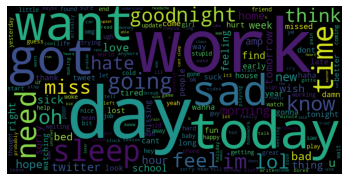

In [95]:
wc = WordCloud(width = 800 , height = 400).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

# SPelling Correction

In [97]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [98]:
from textblob import TextBlob

In [107]:
x = 'tanks forr waching this vidio carri'

In [108]:
x = TextBlob(x).correct()

In [109]:
x

TextBlob("tanks for watching this video carry")

# Tokenization

# x = 'thanks4watching this video. please like it'

In [113]:
TextBlob(x).words

WordList(['thanks4watching', 'this', 'video', 'please', 'like', 'it'])

In [114]:
doc = nlp(x)
for token in doc:
    print(token)

thanks4watching
this
video
.
please
like
it


# Lemmatization

In [119]:
x = 'runs run running ran'

In [117]:
from textblob import Word

In [120]:
for token in x.split():
    print(Word(token).lemmatize())

run
run
running
ran


In [121]:
doc = nlp(x)
for token in doc:
    print(token.lemma_)

run
run
run
run


# Detect Entities using NER of Spacy

In [123]:
x = "Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon"

In [124]:
doc = nlp(x)
for ent in doc.ents:
    print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

Donald Trump - PERSON - People, including fictional
USA - GPE - Countries, cities, states


In [125]:
from spacy import displacy

In [126]:
displacy.render(doc,style = 'ent')

# DEtetcting Nouns

In [127]:
for noun in doc.noun_chunks:
    print(noun)

Breaking News
Donald Trump
the president
the USA
a deal
the moon


# Translation and Language Detection

In [128]:
#Language Code: https://www.loc.gov/standards/iso639-2/php/code_list.php

In [129]:
tb = TextBlob(x)

In [132]:
tb.detect_language()

HTTPError: HTTP Error 400: Bad Request

In [134]:
tb.translate(to='hi')

TextBlob("ब्रेकिंग न्यूज़: डोनाल्ड ट्रम्प, संयुक्त राज्य अमेरिका के राष्ट्रपति को चंद्रमा के लिए एक सौदा करने के लिए देख रहे हैं")

# Use inbuilt sentiment classifier

In [135]:
from textblob.sentiments import NaiveBayesAnalyzer

In [136]:
x = 'we all stands together to fight with corona virus. we will win together'

In [137]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [138]:
tb.sentiment


Sentiment(classification='pos', p_pos=0.8259779151942094, p_neg=0.17402208480578962)

In [139]:
x = 'we all are sufering from corona'

In [140]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [141]:
tb.sentiment


Sentiment(classification='pos', p_pos=0.75616044472398, p_neg=0.2438395552760203)

# advance text processing

# N-Grams

In [142]:
x = 'thanks for watching'

In [143]:
tb = TextBlob(x)

In [146]:
tb.ngrams(2)

[WordList(['thanks', 'for']), WordList(['for', 'watching'])]

# Bag of Words

In [147]:
x = ['this is first sentence this is', 'this is second', 'this is last']

In [148]:
from sklearn.feature_extraction.text import CountVectorizer

In [149]:
cv = CountVectorizer(ngram_range=(1,1))
text_counts = cv.fit_transform(x)

In [150]:
text_counts.toarray()

array([[1, 2, 0, 0, 1, 2],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1]], dtype=int64)

In [151]:
cv.get_feature_names()

['first', 'is', 'last', 'second', 'sentence', 'this']

In [152]:
bow = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())

In [153]:
bow

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [154]:
x

['this is first sentence this is', 'this is second', 'this is last']

# Term Frequency

In [155]:
bow.shape

(3, 6)

In [156]:
tf = bow/bow.shape[1]

In [157]:
tf

,first,is,last,second,sentence,this
0,0.166667,0.333333,0.000000,0.000000,0.166667,0.333333
1,0.000000,0.166667,0.000000,0.166667,0.000000,0.166667
2,0.000000,0.166667,0.166667,0.000000,0.000000,0.166667


In [158]:
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index, col] = tf.loc[index, col]/sum(row[1].values)

In [160]:
tf

,first,is,last,second,sentence,this
0,0.166667,0.333333,0.00,0.00,0.166667,0.333333
1,0.000000,0.333333,0.00,0.25,0.000000,0.222222
2,0.000000,0.333333,0.25,0.00,0.000000,0.222222


# Inverse Document Frequencies

In [161]:
import numpy as np

In [162]:
x_df = pd.DataFrame(x, columns=['words'])

In [163]:
x_df

,words
0,this is first sentence this is
1,this is second
2,this is last


In [164]:
bow

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [165]:
N = bow.shape[0]
N 

3

In [166]:
bb = bow.astype('bool')
bb

,first,is,last,second,sentence,this
0,True,True,False,False,True,True
1,False,True,False,True,False,True
2,False,True,True,False,False,True


In [167]:
bb['first'].sum()

1

In [168]:
bb['is'].sum()

3

In [169]:
cols = bb.columns
cols

Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')

In [170]:
nz =[]
for col in cols:
    nz.append(bb[col].sum())

In [171]:
nz

[1, 3, 1, 1, 1, 3]